# Homework

##### Dataset

In this homework, we'll build a model for classifying various hair types. For this, we will use the Hair Type dataset that was obtained from Kaggle and slightly rebuilt.

Link: https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset

In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

##### Preparing the dataset
The dataset contains around 1000 images of hairs in the separate folders for training and test sets.

In [2]:
train_dir = 'C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_8\\Homework\\data\\train'
test_dir = 'C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_8\\Homework\\data\\test'

##### Reproducibility

Reproducibility in deep learning is a multifaceted challenge that requires attention to both software and hardware details. In some cases, we can't guarantee exactly the same results during the same experiment runs. Therefore, in this homework we suggest to:

install tensorflow version 2.17.1
set the seed generators by:

In [3]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (200, 200, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use SGD with the following parameters:
- SGD(lr=0.002, momentum=0.8)
For clarification about kernel size and max pooling, check Office Hours.

In [4]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])


c:\Users\Sandra\Documents\Cursos\MLZoomcamp2024\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Question 1

Since we have a binary classification problem, what is the best loss function for us?

1) mean squared error
2) **binary crossentropy**
3) categorical crossentropy
4) cosine similarity

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

In [5]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

None


#### Question 2

What's the total number of parameters of the model? You can use the summary method for that.

1) 896
2) 11214912
3) 15896912
4) **20072512**

##### Generators and Training
For the next two questions, use the following data generator for both train and test sets:

ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets.

For training use .fit() with the following params:

model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
Epoch 1/10


c:\Users\Sandra\Documents\Cursos\MLZoomcamp2024\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - acc: 0.5439 - loss: 0.7314 - val_acc: 0.5224 - val_loss: 0.7074
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - acc: 0.6185 - loss: 0.6378 - val_acc: 0.6169 - val_loss: 0.6306
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - acc: 0.6794 - loss: 0.5931 - val_acc: 0.6219 - val_loss: 0.6266
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - acc: 0.6551 - loss: 0.6034 - val_acc: 0.6219 - val_loss: 0.6681
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 368ms/step - acc: 0.6893 - loss: 0.5775 - val_acc: 0.6269 - val_loss: 0.6330
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 356ms/step - acc: 0.6904 - loss: 0.5756 - val_acc: 0.6269 - val_loss: 0.6244
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - acc: 0.6821 - loss: 0.6049 - val_acc: 0.6368 - val_loss: 0.6321
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - acc: 0.7047 - loss: 0.5482 - val_acc: 0.6468 - val_loss: 0.6442
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - acc: 0.73

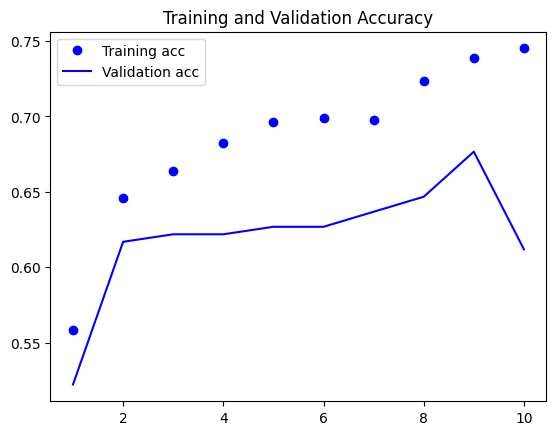

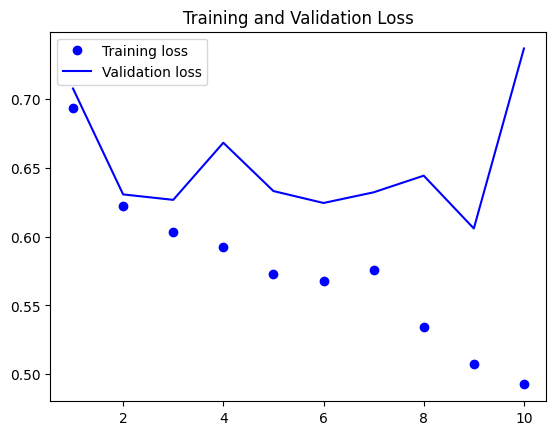

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#### Question 3

What is the median of training accuracy for all the epochs for this model?

1) 0.10
2) 0.32
3) 0.50
4) **0.72**

In [8]:
acc_median = np.median(acc)
acc_median

0.6968750059604645

#### Question 4

What is the standard deviation of training loss for all the epochs for this model?

1) 0.028
2) **0.068**
3) 0.128
4) 0.168

In [9]:
loss_std = np.std(loss)
loss_std

0.05509295961057107

##### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

In [10]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

#### Question 5

Let's train our model for 10 more epochs using the same code as previously.

Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

1) 0.26
2) **0.56**
3) 0.86
4) 1.16

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - acc: 0.5894 - loss: 0.6807

c:\Users\Sandra\Documents\Cursos\MLZoomcamp2024\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - acc: 0.5897 - loss: 0.6801 - val_acc: 0.6318 - val_loss: 0.6385
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - acc: 0.6464 - loss: 0.6353 - val_acc: 0.6368 - val_loss: 0.6304
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 453ms/step - acc: 0.6586 - loss: 0.6420 - val_acc: 0.6368 - val_loss: 0.6328
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - acc: 0.6846 - loss: 0.6111 - val_acc: 0.6418 - val_loss: 0.6310
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - acc: 0.6830 - loss: 0.6020 - val_acc: 0.6468 - val_loss: 0.6148
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - acc: 0.6928 - loss: 0.5916 - val_acc: 0.6617 - val_loss: 0.5917
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - acc: 0.6860 - loss: 0.5957 - val_acc: 0.6468 - val_loss: 0.5934
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - acc: 0.6903 - loss: 0.5841 - val_acc: 0.6716 - val_loss: 0.5910
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - acc: 0.6754 

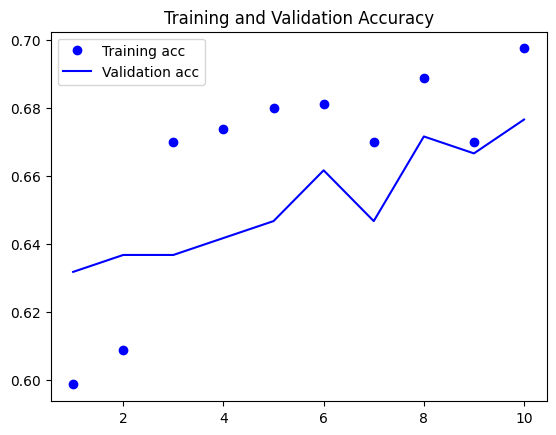

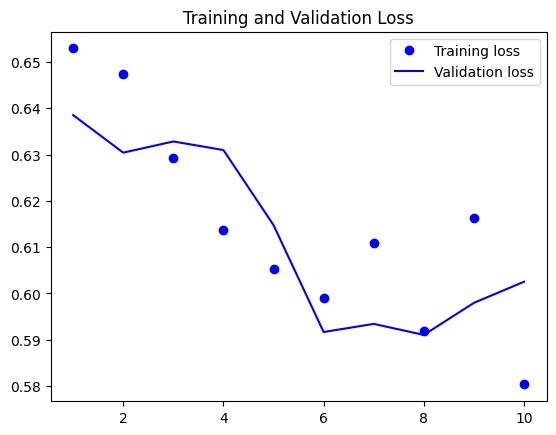

In [12]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [13]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.6124083518981933

#### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

1) 0.31
2) 0.51
3) **0.71**
4) 0.91

In [14]:
val_acc_aug[5:10]
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.6646766185760498